## Linear regression with multiple variables

Let's use the `boston` dataset:

In [3]:
library(MASS)
library(data.table)

In [4]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [5]:
boston_dt = data.table(Boston)

Take the `medv` (median value of owner-occupied homes in $1000s.) as target variable

In [151]:
y = boston_dt$medv

In [7]:
X = as.matrix(boston_dt[,.(age,dis,lstat)])

In [8]:
library(rstan)

stan_data = list(n_points = nrow(X),
                 m_variables = ncol(X),
                 x = X,
                 y = y)

fit <- stan("mult_linear_regression.stan", data = stan_data, chains = 2, 
            iter = 7000, warmup = 1000, thin = 10)

Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Warning message in readLines(file, warn = TRUE):
“incomplete final line found on '/home/guillermo/bayesian_excercise/bayesian-programming-exercises/linear_models/mult_linear_regression.stan'”


SAMPLING FOR MODEL 'mult_linear_regression' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000125 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.25 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 7000 [  0%]  (Warmup)
Chain 1: Iteration:  700 / 7000 [ 10%]  (Warmup)
Chain 1: Iteration: 1001 / 7000 [ 14%]  (Sampling)
Chain 1: Iteration: 1700 / 7000 [ 24%]  (Sampling)
Chain 1: Iteration: 2400 / 7000 [ 34%]  (Sampling)
Chain 1: Iteration: 3100 / 7000 [ 44%]  (Sampling)
Chain 1: Iteration: 3800 / 7000 [ 54%]  (Sampling)
Chain 1: Iteration: 4500 / 7000 [ 64%]  (Sampling)
Chain 1: Iteration: 5200 / 7000 [ 74%]  (Sampling)
Chain 1: Iteration: 5900 / 7000 [ 84%]  (Sampling)
Chain 1: Iteration: 6600 / 7000 [ 94%]  (Sampling)
Chain 1: Iteration: 7000 / 7000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.973624 seconds (Warm-up)
Chain 1:                6.08415 seconds (Sampling)
Ch

Let's look at the distribution of the parameters:

ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)


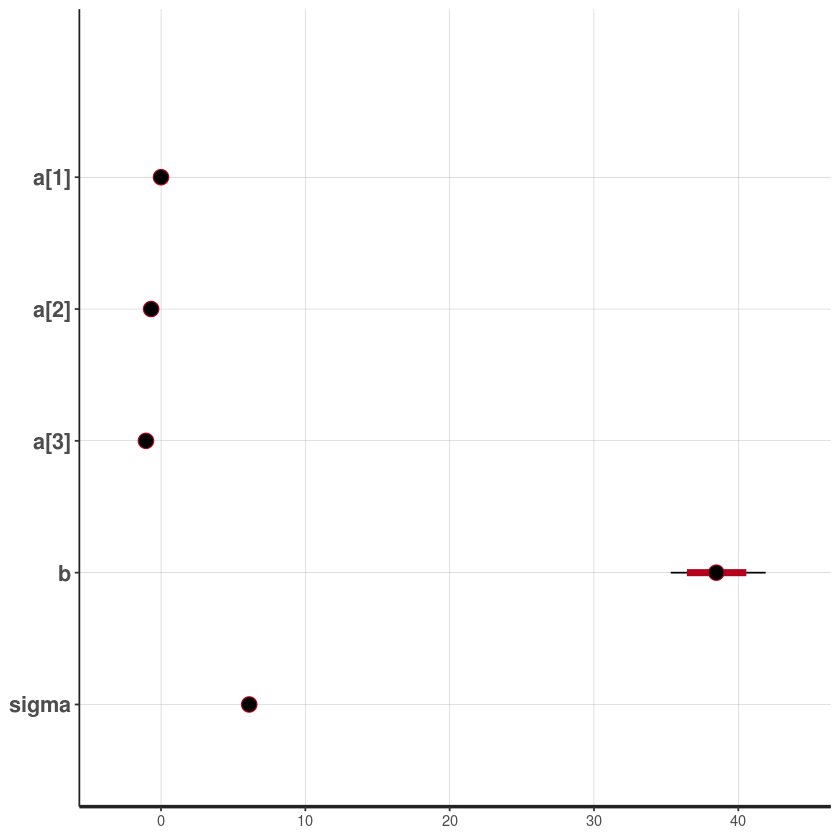

In [7]:
plot(fit)


In [9]:
res <- as.data.table(fit)
library(plyr)
res = rename(res, replace = c( "a[1]" = "age","a[2]" = "dis","a[3]" = "lstat" ))

Warning message in melt.data.table(res):
“To be consistent with reshape2's melt, id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


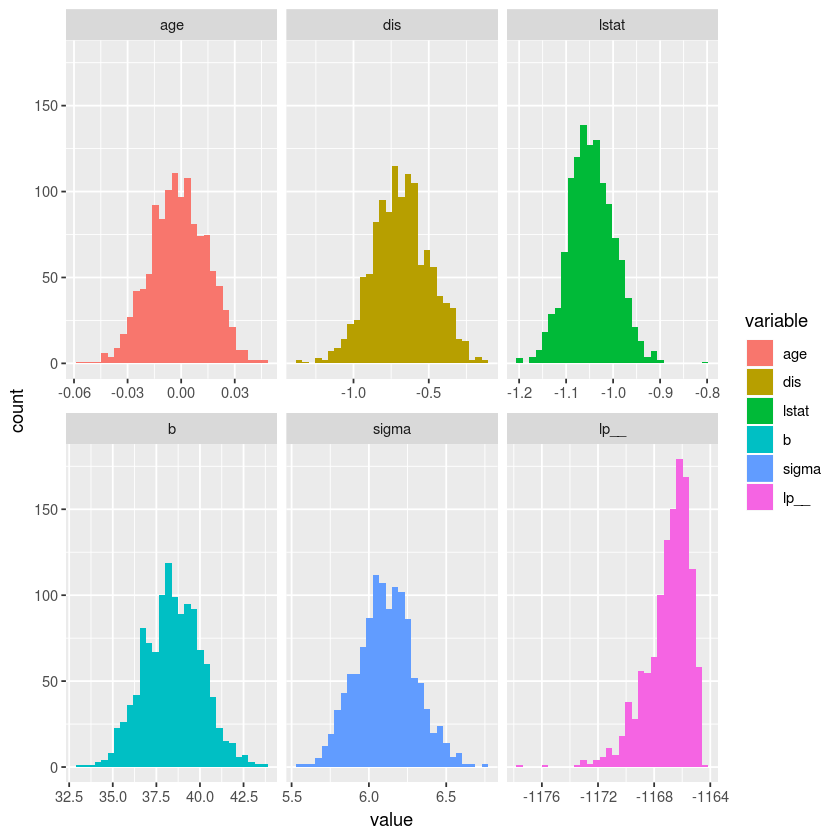

In [10]:
library(ggplot2)
ggplot(melt(res)) + geom_histogram(aes( x = value,fill = variable)) + facet_wrap(aes(variable), scales = "free_x")

And the converge of the chains:

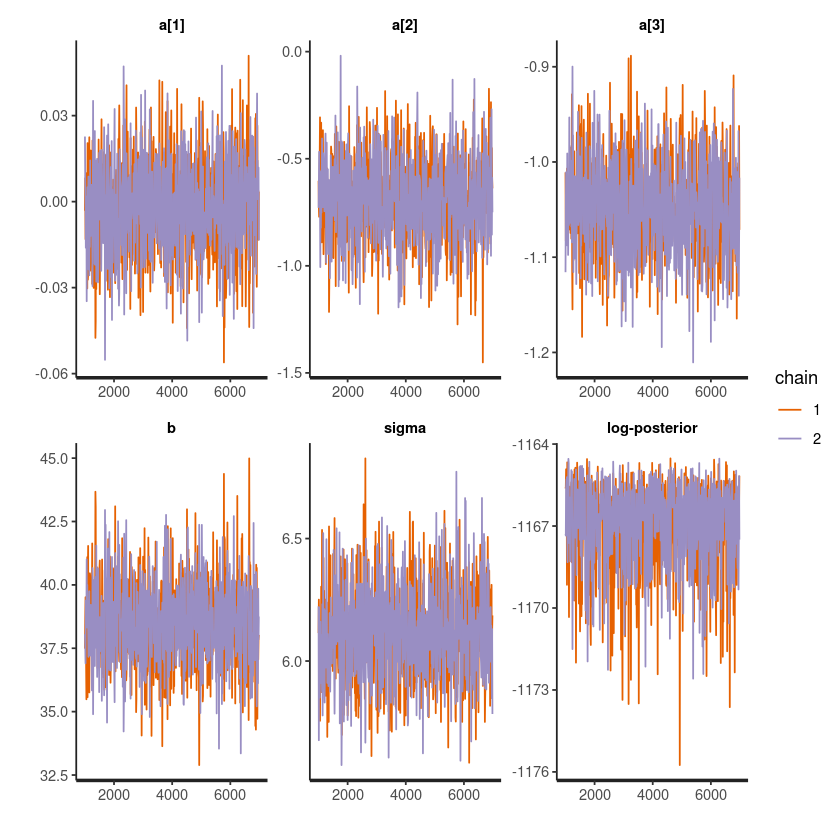

In [10]:
traceplot(fit, pars = c("a", "b","sigma","lp__"), inc_warmup = FALSE, nrow = 2)


Everything looks good so far: both chains seem to converge to the same high density area. Let's take only one chain.

In [11]:
library(rstan)

stan_data = list(n_points = nrow(X),
                 m_variables = ncol(X),
                 x = X,
                 y = y)

fit <- stan("mult_linear_regression.stan", data = stan_data, chains = 1, 
            iter = 5000, warmup = 2000, thin = 10)

Warning message in readLines(file, warn = TRUE):
“incomplete final line found on '/home/guillermo/bayesian_excercise/bayesian-programming-exercises/linear_models/mult_linear_regression.stan'”


SAMPLING FOR MODEL 'mult_linear_regression' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1: Iteration:  500 / 5000 [ 10%]  (Warmup)
Chain 1: Iteration: 1000 / 5000 [ 20%]  (Warmup)
Chain 1: Iteration: 1500 / 5000 [ 30%]  (Warmup)
Chain 1: Iteration: 2000 / 5000 [ 40%]  (Warmup)
Chain 1: Iteration: 2001 / 5000 [ 40%]  (Sampling)
Chain 1: Iteration: 2500 / 5000 [ 50%]  (Sampling)
Chain 1: Iteration: 3000 / 5000 [ 60%]  (Sampling)
Chain 1: Iteration: 3500 / 5000 [ 70%]  (Sampling)
Chain 1: Iteration: 4000 / 5000 [ 80%]  (Sampling)
Chain 1: Iteration: 4500 / 5000 [ 90%]  (Sampling)
Chain 1: Iteration: 5000 / 5000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.39031 seconds (Warm-up)
Chain 1:                2.24349 seconds (Sampling)
Chain 1:     

Let's compare our sampled parameters with the value obtained with the *frequentist* version of linear regressions (aka least squares):

In [12]:
linear_freq_model = lm(data = boston_dt,formula = medv~age+dis+lstat)
linear_freq_model


Call:
lm(formula = medv ~ age + dis + lstat, data = boston_dt)

Coefficients:
(Intercept)          age          dis        lstat  
  38.535037    -0.001886    -0.691851    -1.046962  


Warning message in melt.data.table(res):
“To be consistent with reshape2's melt, id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


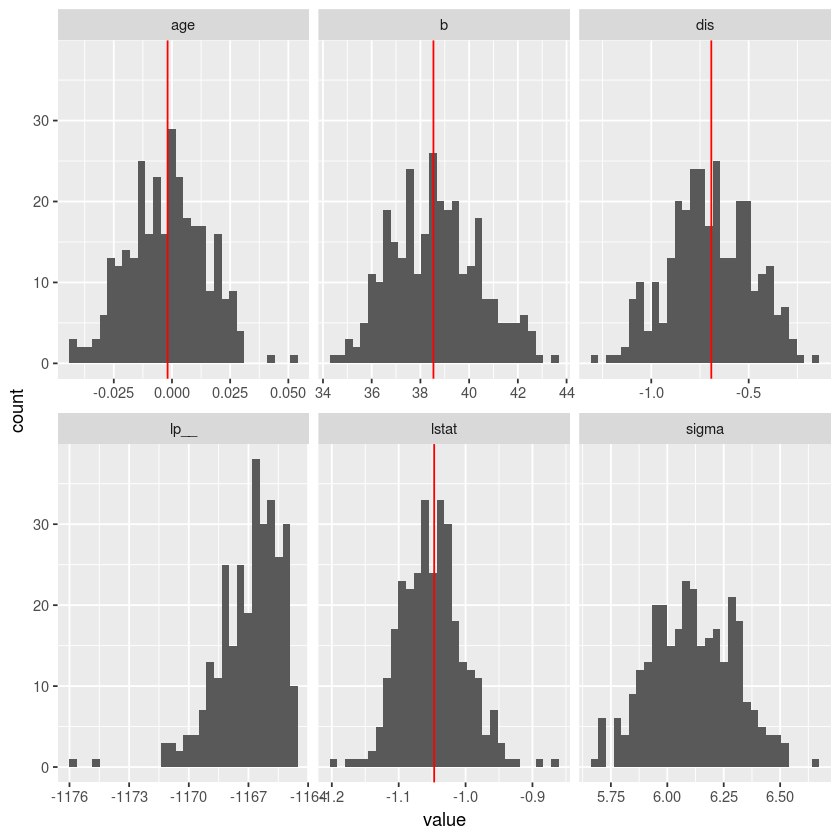

In [13]:
library(ggplot2)
res <- as.data.table(fit)
library(plyr)
res = rename(res, replace = c( "a[1]" = "age","a[2]" = "dis","a[3]" = "lstat" ))
freq_coeffs = as.data.table(linear_freq_model$coefficients)
freq_coeffs = cbind(freq_coeffs,data.table(variable = c("b","age","dis","lstat")))


ggplot(melt(res)) + geom_histogram(aes( x = value)) + facet_wrap(aes(variable), scales = "free_x") + geom_vline(aes(xintercept = V1),data = freq_coeffs,color = "red")



In [14]:
mean

V1,variable
38.535037394,b
-0.001886175,age
-0.691851270,dis
-1.046962418,lstat


So the parameters are not that far from the mode of the marginal distributions. If we want a single number summarizing the posterior samples of the parameters, we could use the mean of each marginal sample: 

In [18]:
mean_of_sample = melt(res )[,mean(value),by = "variable"]
mean_of_sample

Warning message in melt.data.table(res):
“To be consistent with reshape2's melt, id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”

variable,V1
age,-2.249142e-03
dis,-6.997551e-01
lstat,-1.049008e+00
b,3.862747e+01
sigma,6.112472e+00
lp__,-1.166960e+03


Which actually is not that far from the value estimated by least squares. Furthermore, using the `generated_quantities` block in Stan we can get the square error of the prediction together with $R^{2}$, for different samplings of the parameters.

In [191]:
library(rstan)

stan_data = list(n_points = nrow(X),
                 m_variables = ncol(X),
                 x = X,
                 y = y)

fit_eval <- stan("mult_linear_regression_eval.stan", data = stan_data, chains = 1, 
            iter = 5000, warmup = 2000, thin = 10)

Warning message in readLines(file, warn = TRUE):
“incomplete final line found on '/home/guillermo/bayesian_excercise/bayesian-programming-exercises/linear_models/mult_linear_regression_eval.stan'”


SAMPLING FOR MODEL 'mult_linear_regression_eval' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1: Iteration:  500 / 5000 [ 10%]  (Warmup)
Chain 1: Iteration: 1000 / 5000 [ 20%]  (Warmup)
Chain 1: Iteration: 1500 / 5000 [ 30%]  (Warmup)
Chain 1: Iteration: 2000 / 5000 [ 40%]  (Warmup)
Chain 1: Iteration: 2001 / 5000 [ 40%]  (Sampling)
Chain 1: Iteration: 2500 / 5000 [ 50%]  (Sampling)
Chain 1: Iteration: 3000 / 5000 [ 60%]  (Sampling)
Chain 1: Iteration: 3500 / 5000 [ 70%]  (Sampling)
Chain 1: Iteration: 4000 / 5000 [ 80%]  (Sampling)
Chain 1: Iteration: 4500 / 5000 [ 90%]  (Sampling)
Chain 1: Iteration: 5000 / 5000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.3866 seconds (Warm-up)
Chain 1:                2.11722 seconds (Sampling)
Chain 1: 

In [192]:
res = as.data.table(fit)

In [193]:
y_pred <- extract(fit, 'y_pred')$y_pred
y_pred <- unlist(y_pred, use.names=FALSE)
Rsq <- extract(fit, 'Rsq')
Rsq <- unlist(Rsq, use.names=FALSE)


Now, `y_pred` is a matrix with the prediction of the points of $X$, for different samplings of the parameters of the model. So:

In [194]:
ncol(y_pred)

[1] 506

Is the number of points in X and:

In [195]:
nrow(y_pred)

[1] 300

Is the number of different samplings. To be consistent:

In [196]:
y_matrix <- t(replicate(nrow(y_pred),y))

In [198]:
nrow(y_matrix)

[1] 300

And: 

In [199]:
ncol(y_matrix)

[1] 506

So, the distribution of mean root square errors looks like:

In [200]:
rse = sqrt(apply((y_matrix-y_pred)^2,mean,MARGIN = 1))

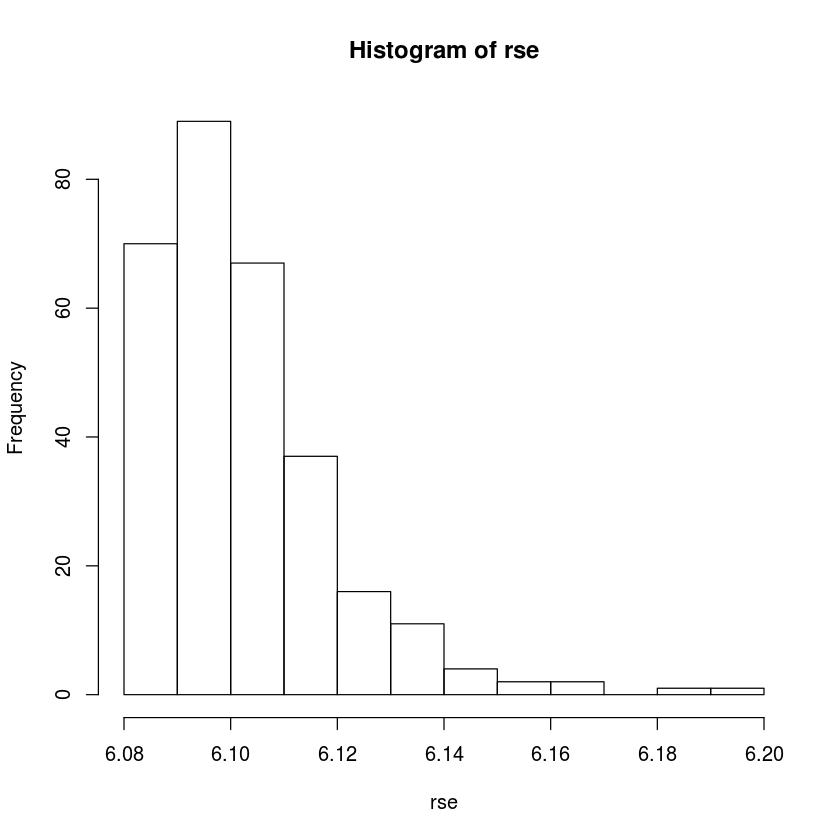

In [201]:
hist(rse)

The minimum error is reached in:

In [202]:
min(rse)

[1] 6.080112

And the mean in:

In [203]:
mean(rse)

[1] 6.102951

If we compare this number to the mean square error of the frequentist model:

In [204]:
sqrt(mean((y-predict(linear_freq_model,boston_dt))^2))

[1] 6.079099

We see that is very close (observe that the frequentist model guarantees that the found parameters have the lowest sqrt).

Another thing one can do to get `raw` parameters of the model (instead of distributions) is using the `optimizing` method of STAN (equivalent to `find_map` in PyMC3) that basically uses a sort of `hill climbing` to find the posterior mode (among maybe many) of the likelihood distribution. This mode could actually be very different from the high mass probability region found by the `sampling` method (as explained [here](https://groups.google.com/forum/#!topic/stan-users/Ox9wJwPCjNY)). But actually, by the nature of our actual problem, it should be close to the mean of the posterior distribution found by `NUTS`.


In [209]:
outOptim <-optimizing(fit@stanmodel, data = stan_data, hessian = T)

In [210]:
outOptim$par

a[1]         a[2]         a[3]            b        sigma 
-0.001898385 -0.691538689 -1.046900664 38.534053194  6.078894522

### Regularization